In [1]:
# módulos do python necessários
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Carregando os dados

In [2]:
# importando dados do S&P 500
sp500 = pandas.read_csv('SP500_1979.csv')

# visualizando as primeiras observações do dataset
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1979-04-16,102.000000,102.019997,100.669998,101.120003,101.120003,28050000
1,1979-04-17,101.120003,101.940002,100.650002,101.239998,101.239998,29260000
2,1979-04-18,101.239998,102.230003,100.959999,101.699997,101.699997,29510000
3,1979-04-19,101.699997,102.400002,100.879997,101.279999,101.279999,31150000
4,1979-04-20,101.279999,101.809998,100.459999,101.230003,101.230003,28830000


In [3]:
# verificando os tipos dos dados das variáveis do dataset
sp500.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
# alterando o tipo da variável "Date" para o tipo data
sp500['Date'] = pandas.to_datetime(sp500['Date'])
sp500.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [32]:
# criando a variável de retorno
sp500['Return'] = ((sp500['Close']-sp500['Open'])/sp500['Open'])*100
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,1979-04-16,102.000000,102.019997,100.669998,101.120003,101.120003,28050000,-0.862742
1,1979-04-17,101.120003,101.940002,100.650002,101.239998,101.239998,29260000,0.118666
2,1979-04-18,101.239998,102.230003,100.959999,101.699997,101.699997,29510000,0.454365
3,1979-04-19,101.699997,102.400002,100.879997,101.279999,101.279999,31150000,-0.412977
4,1979-04-20,101.279999,101.809998,100.459999,101.230003,101.230003,28830000,-0.049364


### Visualizando a série temporal

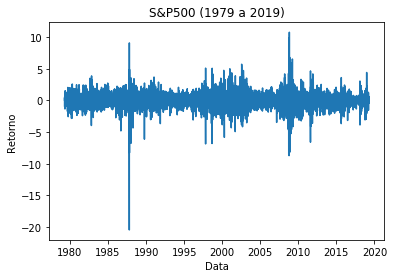

In [33]:
# selecionando as variáveis
sp500_subset = sp500[['Date', 'Return']]

# definindo a coluna de data como o index do dataset sp500_subset
sp500_subset = sp500_subset.set_index('Date')

# gerando visualização da s[erie temporal de retorno
plt.plot(sp500_subset)
plt.ylabel('Retorno')
plt.xlabel('Data')
plt.title('S&P500 (1979 a 2019)')
plt.show()

### Cálculo do expoente de hurst

In [37]:
# explodindo o dataset em 80 intervalos, ou "janelas"
N = []
for i in range(1,81):
    N.append(np.array_split(sp500_subset, i))

In [38]:
# calculando a média de retorno para cada intervalo
mean_N = []
for i in range(len(N)):
    m = []
    for j in range(len(N[i])):
        m.append(N[i][j].mean())
    mean_N.append(m)

In [40]:
# criando série de desvios para cada janela
desv_N = []
for i in range(len(N)):
    d = []
    for j in range(len(N[i])):
        d.append(N[i][j]-mean_N[i][j])
    desv_N.append(d)

In [41]:
# criando série do desvios da média do retorno acumulado por janela
cumsum = []
for i in range(len(desv_N)):
    c = []
    for j in range(len(desv_N[i])):
        c.append(desv_N[i][j].cumsum(axis=0))
    cumsum.append(c)

In [43]:
# cálculo da maior diferença na série dos desvios acumulado do retorno
diff_R = []
for i in range(len(cumsum)):
    diff = []
    for j in range(len(cumsum[i])):
        diff.append(cumsum[i][j].max()-cumsum[i][j].min())
    diff_R.append(diff)

In [44]:
# cálculo do desvio padrão para cada janela
sd_R = []
for i in range(len(cumsum)):
    sd = []
    for j in range(len(cumsum[i])):
        sd.append(cumsum[i][j].std())
    sd_R.append(sd)

In [61]:
# cálculo do intervalo redimensionado para cada janela da série histórica
RS_N = []
for i in range(len(diff_R)):
    rs = []
    for j in range(len(diff_R[i])):
        rs.append(diff_R[i][j]/sd_R[i][j])
    RS_N.append(rs)
    
# cálculo da média dos valores das janelas escalonados
RS = []
for i in range(len(RS_N)):
    RS.append(sum(RS_N[i])/len(RS_N[i]))

In [63]:
# tamanho das janelas
n_size = []
for i in range(len(N)):
    n = []
    for j in range(len(N[i])):
        n.append(N[i][j].count())
    n_size.append(n)

nmean_size = []
for i in range(len(n_size)):
    nmean_size.append(sum(n_size[i])/len(n_size[i]))

<function matplotlib.pyplot.show(*args, **kw)>

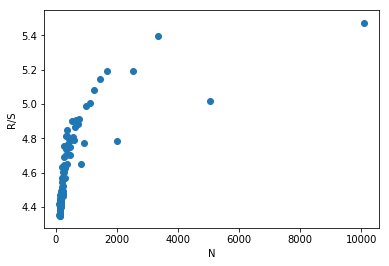

In [66]:
# visualizando R/S x N
plt.scatter(x=nmean_size, y=RS)
plt.ylabel('R/S')
plt.xlabel('N')
plt.show

In [67]:
# calculando os logarítmicos
RSlog = np.log(RS)
Nlog = np.log(nmean_size)

In [82]:
# criando data frame para gerar visualização
RS_df = pandas.DataFrame(RSlog)
RS_df.rename(columns={0:'log(R/S)'}, inplace = True) # alterando o nome da coluna
RS_df['id'] = RS_df.index

N_df = pandas.DataFrame(Nlog)
N_df.rename(columns={0:'log(N)'}, inplace = True) # alterando o nome da coluna
N_df['id'] = RS_df.index

df = pandas.merge(RS_df, N_df, on='id')
df.head()

,log(R/S),id,log(N)
0,1.699851,0,9.219003
1,1.613363,1,8.525856
2,1.685852,2,8.120390
3,1.647242,3,7.832708
4,1.565824,4,7.609565


C:\Users\Ana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


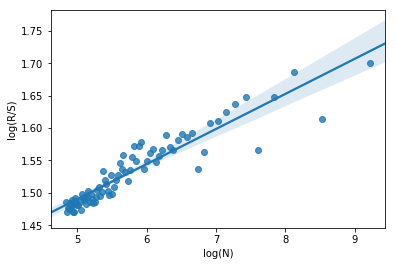

In [83]:
# visualizando a regressão
sns.regplot(x='log(N)', y='log(R/S)', data=df)

In [87]:
# criando o regressor
reg = LinearRegression()

# ajustando o modelo
X = df['log(N)'].as_matrix()
X = X.reshape(-1,1)
y = df['log(R/S)'].as_matrix()
reg.fit(X,y)
print(reg.score(X,y))
print(reg.coef_)

0.8714877235043706
[0.05406206]


C:\Users\Ana\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\Ana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
